# Product 5

# Linear regression with random state, Hyperperams,KFold Validations 

Mean Squared Error (MSE): 30.802946269723762
Root Mean Squared Error (RMSE): 5.550040204333998
Mean Absolute Error (MAE): 4.425372949319462
R-squared (R2): 0.860430841023563
R-squared value: 0.8608993455115623


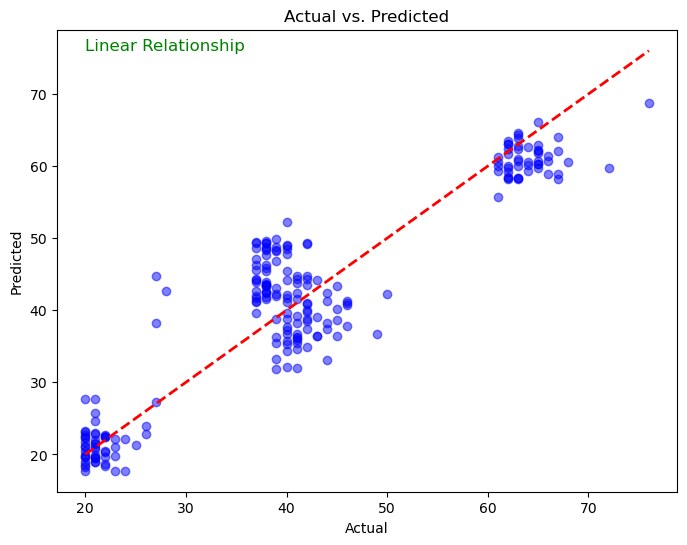

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("New_Final.csv")  # Replace with the actual file path

X = df[['Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Pressure', 'IntCondition','IntSeason','Event']]  
y = df["p5"]  # target column

# Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Training
linear_regressor.fit(X_train, y_train)

# Test data
y_pred = linear_regressor.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

#  residuals 
residuals = y_test - y_pred

#  R-squared
r2_value = 1 - (np.var(residuals) / np.var(y_test))

print(f"R-squared value: {r2_value}")

# Linear regression line 
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# relationship is linear or not 
if r2_value > 0.6:  # 
    plt.text(min(y_test), max(y_test), 'Linear Relationship', fontsize=12, color='green')
else:
    plt.text(min(y_test), max(y_test), 'Non-Linear Relationship', fontsize=12, color='red')

plt.show()


Mean Squared Error (MSE): 30.33502919919081
Root Mean Squared Error (RMSE): 5.507724502840607
Mean Absolute Error (MAE): 4.425428434911904
R-squared (R2): 0.8625509886040298


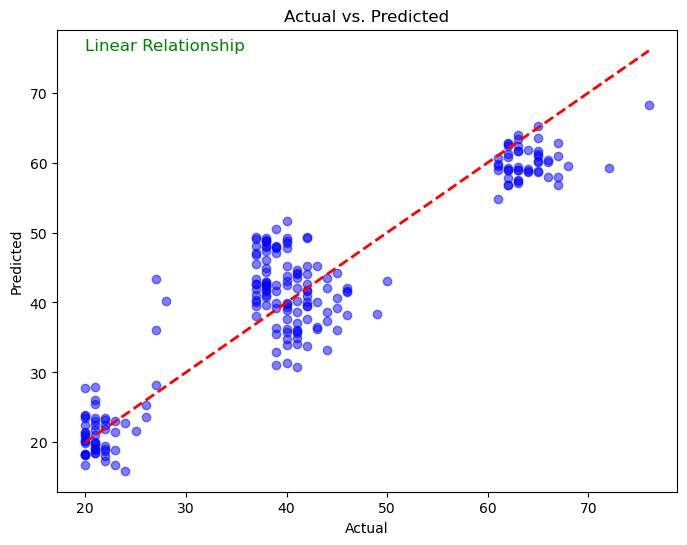

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("New_Final.csv")  


X = df[['Temperature', 'Dew Point', 'Humidity',  'Wind Speed', 'Pressure', 'IntCondition','IntSeason','Event']]  # Replace with your feature columns
y = df["p5"]  # target column

#  training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize parameters
learning_rate = 0.01  #Tested for .0001  .1 .01    after increasing value from 0.1 result are not getting chnged 
num_iterations = 500  #Tested for 1000 after applying 500 and 1000 it give 0.544 but after it no chnge found by chnging value 

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a column of ones to X for the intercept term
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Initialize coefficients
coefficients = np.zeros(X_train_scaled.shape[1])

# Gradient Descent
for _ in range(num_iterations):
    errors = X_train_scaled.dot(coefficients) - y_train
    gradient = X_train_scaled.T.dot(errors) / len(y_train)
    coefficients -= learning_rate * gradient

# test data
y_pred = X_test_scaled.dot(coefficients)


# errors
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
# Linear regression line 
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# relationship is linear or not 
if r2_value > 0.6:  # 
    plt.text(min(y_test), max(y_test), 'Linear Relationship', fontsize=12, color='green')
else:
    plt.text(min(y_test), max(y_test), 'Non-Linear Relationship', fontsize=12, color='red')

plt.show()


Mean Squared Error (MSE): 30.33502919919081
Root Mean Squared Error (RMSE): 5.507724502840607
Mean Absolute Error (MAE): 4.425428434911904
R-squared (R2): 0.8625509886040298


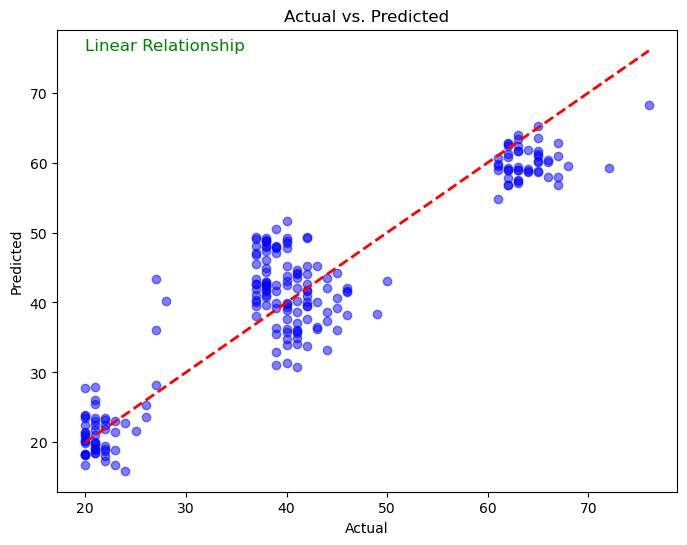

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("New_Final.csv")  


X = df[['Temperature', 'Dew Point', 'Humidity',  'Wind Speed', 'Pressure', 'IntCondition','IntSeason','Event']]  # Replace with your feature columns
y = df["p5"]  # target column

#  training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize parameters
learning_rate = 0.01  #Tested for .0001  .1 .01    after increasing value from 0.1 result are not getting chnged 
num_iterations = 500  #Tested for 1000 after applying 500 and 1000 it give 0.544 but after it no chnge found by chnging value 

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a column of ones to X for the intercept term
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Initialize coefficients
coefficients = np.zeros(X_train_scaled.shape[1])

# Gradient Descent
for _ in range(num_iterations):
    errors = X_train_scaled.dot(coefficients) - y_train
    gradient = X_train_scaled.T.dot(errors) / len(y_train)
    coefficients -= learning_rate * gradient

# test data
y_pred = X_test_scaled.dot(coefficients)


# errors
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
# Linear regression line 
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# relationship is linear or not 
if r2_value > 0.6:  # 
    plt.text(min(y_test), max(y_test), 'Linear Relationship', fontsize=12, color='green')
else:
    plt.text(min(y_test), max(y_test), 'Non-Linear Relationship', fontsize=12, color='red')

plt.show()


# Random Forest Regressor 

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("New_Final.csv")  


X = df[['Temperature', 'Dew Point', 'Humidity',  'Wind Speed', 'Pressure', 'IntCondition','IntSeason','Event']]  # Replace with your feature columns
y = df["p5"]  # target column

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=10000, random_state=42)

# Initialize KFold cross-validator
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store evaluation metrics across folds
mse_list = []
rmse_list = []
mae_list = []
r2_list = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

# Calculate mean metrics across folds
mean_mse = np.mean(mse_list)
mean_rmse = np.mean(rmse_list)
mean_mae = np.mean(mae_list)
mean_r2 = np.mean(r2_list)

print(f"Mean Squared Error (MSE): {mean_mse}")
print(f"Mean Root Mean Squared Error (RMSE): {mean_rmse}")
print(f"Mean Absolute Error (MAE): {mean_mae}")
print(f"Mean R-squared (R2): {mean_r2}")


Mean Squared Error (MSE): 5.125450130189938
Mean Root Mean Squared Error (RMSE): 2.2589477460188356
Mean Absolute Error (MAE): 1.6625944292237442
Mean R-squared (R2): 0.977874296975709


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset
df = pd.read_csv("New_Final.csv")  # Replace with the actual file path
# Drop rows with missing values
df.dropna(inplace=True)
# Assuming 'X' are the features and 'y' is the target variable
X = df[['Temperature', 'Dew Point', 'Humidity',  'Wind Speed', 'Pressure', 'IntCondition', 'IntSeason','Event']]  # Replace with your feature columns
y = df["p5"]  # Replace with your target column

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2']  # Set max_features to 1.0 instead of 'auto'
}

# Create a Random Forest Regressor model with max_features explicitly set to 1.0
model = RandomForestRegressor(max_features=1.0, random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')

# Fit the Grid Search to the data
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best R-squared:", grid_search.best_score_)

# Use the best model from Grid Search
best_model = grid_search.best_estimator_

# Initialize KFold cross-validator
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store evaluation metrics across folds
r2_list = []

# Perform k-fold cross-validation with the best model
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model to the training data
    best_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)

    r2_list.append(r2)

# Calculate mean R-squared across folds
mean_r2 = np.mean(r2_list)

print(f"Mean R-squared (R2) with Best Model: {mean_r2}")
import pickle
with open('p5.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

Best Hyperparameters: {'max_depth': 10, 'max_features': 1.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best R-squared: 0.9660616497898349
Mean R-squared (R2) with Best Model: 0.9785358008571585


In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

mse_list = []
rmse_list = []
mae_list = []

mse_list.append(mse)
rmse_list.append(rmse)
mae_list.append(mae)


# Calculate mean metrics across folds
mean_mse = np.mean(mse_list)
mean_rmse = np.mean(rmse_list)
mean_mae = np.mean(mae_list)


print(f"Mean Squared Error (MSE): {mean_mse}")
print(f"Mean Root Mean Squared Error (RMSE): {mean_rmse}")
print(f"Mean Absolute Error (MAE): {mean_mae}")



Mean Squared Error (MSE): 38.57080886984803
Mean Root Mean Squared Error (RMSE): 6.210540143163719
Mean Absolute Error (MAE): 3.2635363085441984


# Decision Tree

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset
df = pd.read_csv("Final Data.csv")

X = df[['Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Pressure', 'IntCondition', 'IntSeason']]
y = df["p5"]

# Create a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Initialize KFold cross-validator
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store evaluation metrics across folds
mse_list = []
rmse_list = []
mae_list = []
r2_list = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

# Calculate mean metrics across folds
mean_mse = np.mean(mse_list)
mean_rmse = np.mean(rmse_list)
mean_mae = np.mean(mae_list)
mean_r2 = np.mean(r2_list)

print(f"Mean Squared Error (MSE): {mean_mse}")
print(f"Mean Root Mean Squared Error (RMSE): {mean_rmse}")
print(f"Mean Absolute Error (MAE): {mean_mae}")
print(f"Mean R-squared (R2): {mean_r2}")


Mean Squared Error (MSE): 129.9754794520548
Mean Root Mean Squared Error (RMSE): 11.327164121652475
Mean Absolute Error (MAE): 4.896816106268161
Mean R-squared (R2): 0.5216476478341822


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset
df = pd.read_csv("New_Final.csv")

X = df[['Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Pressure', 'IntCondition', 'IntSeason']]
y = df["p5"]

# Create a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Define hyperparameters and their potential values for tuning
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize KFold cross-validator
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize GridSearchCV with cross-validation and hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error')

# Lists to store evaluation metrics across folds
mse_list = []
rmse_list = []
mae_list = []
r2_list = []

# Perform k-fold cross-validation with hyperparameter tuning
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Get the best estimator (model with best hyperparameters)
    best_model = grid_search.best_estimator_

    # Make predictions on the test data
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

# Calculate mean metrics across folds
mean_mse = np.mean(mse_list)
mean_rmse = np.mean(rmse_list)
mean_mae = np.mean(mae_list)
mean_r2 = np.mean(r2_list)

print(f"Mean Squared Error (MSE): {mean_mse}")
print(f"Mean Root Mean Squared Error (RMSE): {mean_rmse}")
print(f"Mean Absolute Error (MAE): {mean_mae}")
print(f"Mean R-squared (R2): {mean_r2}")


Mean Squared Error (MSE): 64.60293193664567
Mean Root Mean Squared Error (RMSE): 7.950090017385672
Mean Absolute Error (MAE): 3.2712466061811107
Mean R-squared (R2): 0.762653905523681


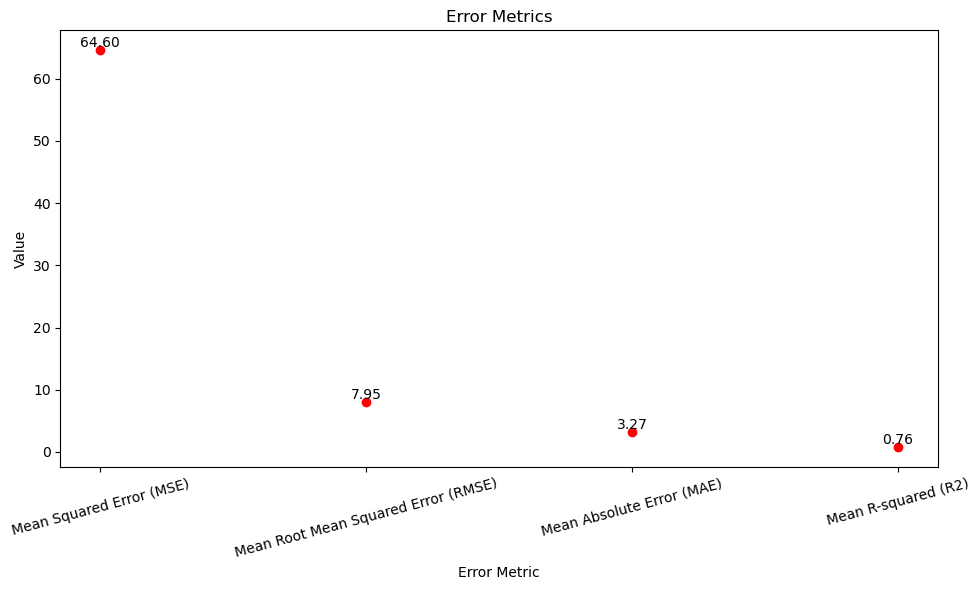

In [1]:
import matplotlib.pyplot as plt

# Error metrics
mse = 64.60293193664567
rmse = 7.950090017385672
mae = 3.2712466061811107
r2 = 0.762653905523681

# Error labels
error_labels = ['Mean Squared Error (MSE)', 'Mean Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)', 'Mean R-squared (R2)']

# Error values
error_values = [mse, rmse, mae, r2]

# Create a plot with the error values as text annotations
plt.figure(figsize=(10, 6))
plt.scatter(error_labels, error_values, color='red', marker='o')
plt.xlabel('Error Metric')
plt.ylabel('Value')
plt.title('Error Metrics')

# Add error values as text annotations
for i, (label, value) in enumerate(zip(error_labels, error_values)):
    plt.text(label, value, f'{value:.2f}', ha='center', va='bottom')

plt.xticks(rotation=15)
plt.tight_layout()

# Display the plot
plt.show()
